In [1]:
latlim = [37.78 37.84]; 
lonlim = [-122.53 -122.40];

In [2]:
numberOfAttempts = 5;
attempt = 0;
info = [];
serverURL = 'http://basemap.nationalmap.gov/ArcGIS/services/USGSImageryOnly/MapServer/WMSServer?';
while(isempty(info))
    try
        info = wmsinfo(serverURL);
        orthoLayer = info.Layer(1);
    catch e 
        
        attempt = attempt + 1;
        if attempt > numberOfAttempts
            throw(e);
        else
            fprintf('Attempting to connect to server:\n"%s"\n', serverURL)
        end        
    end
end

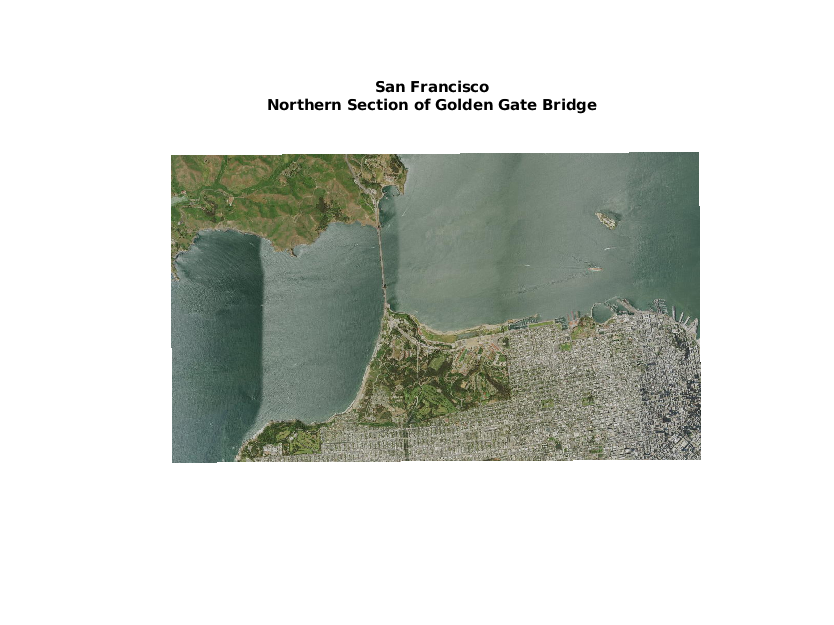

In [3]:
imageLength = 1024;
[A,R] = wmsread(orthoLayer,'Latlim',latlim, ...
                           'Lonlim',lonlim, ...
                           'ImageHeight',imageLength, ...
                           'ImageWidth',imageLength);


axesm('utm', ...
      'Zone',utmzone(latlim, lonlim), ...
      'MapLatlimit', latlim, ...
      'MapLonlimit', lonlim, ...
      'Geoid', wgs84Ellipsoid)
geoshow(A,R)
axis off
title({'San Francisco','Northern Section of Golden Gate Bridge'})